Final Project Submission

Student name: Deon Durrant

Student pace: Flex

Scheduled project review date/time:

Instructor name: Mark Barbour

Blog post URL: https://medium.com/@durrantdeon/to-lambda-or-to-%CE%BB-9fe551fd29d1

# Overview 
The project analyzes historical Aviation Accident Database & Synopse dataset to inform Company Y regarding diversification into the aviation industry. Company Y will utilize the analysis to determine airplane risk and key stakeholders tolerance  along with other metrics beyond the scope of this project.
# Business Problem

Company Y portfolio diversification maybe possible when airplane safety is aligned with not just asset damage but more closely with the community consequences. Identifying the risk or the riskiest models and aircraft, the occurrence of accidents and the extremes of human cost that is fatality versus non injury. Using the aviation accident data, I analyzed trends and patterns of accidents; fatalities; non-injury(uninjured); purpose of flight; country, and airplane engine type, make and model.

# Data Understanding
The aviation accident data set is a global public data set of accidents and incidents since 1979. Each event year has unique ID's associated with fatalities, country and injuries including categorical data such as aircraft type make model etc..

# Initial exploratory data analysis
Import data and convert to pandas dataframe

In [1]:
# Import Librairies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data file
df = pd.read_csv('Aviation_Data.csv',low_memory=False)
Aviation = df
Aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Explore and examine the data 
Examine the data structure.



In [3]:
# Obtain a concise summary of the overall structure of dataframe
Aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
# Number of data points in each varialbe
Aviation.count()

Event.Id                  88889
Investigation.Type        90348
Accident.Number           88889
Event.Date                88889
Location                  88837
Country                   88663
Latitude                  34382
Longitude                 34373
Airport.Code              50249
Airport.Name              52790
Injury.Severity           87889
Aircraft.damage           85695
Aircraft.Category         32287
Registration.Number       87572
Make                      88826
Model                     88797
Amateur.Built             88787
Number.of.Engines         82805
Engine.Type               81812
FAR.Description           32023
Schedule                  12582
Purpose.of.flight         82697
Air.carrier               16648
Total.Fatal.Injuries      77488
Total.Serious.Injuries    76379
Total.Minor.Injuries      76956
Total.Uninjured           82977
Weather.Condition         84397
Broad.phase.of.flight     61724
Report.Status             82508
Publication.Date          73659
dtype: i

In [5]:
#Overview of the numerical features of the dataset
Aviation.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

# Summary of the overall structure of dataframe
The data summary confirms this is a pandas dataframe. The dataframe has 90348 entries within 31 columns
Indication of missing data in 30  of the columns.Decisions regarding handling of such is taken during data cleaning.
dtypes: float64(5), object(26)
memory usage: 21.4+ MB


In [6]:
# Remove duplicates
Aviation.drop_duplicates().head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [7]:
# Examnine columns
Aviation.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# To answer business question and  make recommendations 
1. Focus exclusively on airplanes within the aircraft category
2. Analysis will encompass accidents per year, categorized by country, fatalities, and uninjured individuals
3. Examine the relationship between the number of accidents and aircraft make, model and engine type
4. Delve into the connection between aircraft attributes fatalities and uninjured individuals
5. Analayze data related to the purpose of flight, including accident statistics, fatalities, and uninjured individuals
6. Analysis will include both the commercial and private business segments, as these are of interest to the company 

# Columns for analysis 
['Investigation.Type', ''Event.Date''Injury.Severity', 'Engine.Type', Aircraft.Category''Make', 'Model''Purpose.of.flight 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Aviation Data Dictionary

Column Name	           Short Description	           Meaning

InvestigationType	   Type of Event	      Refers to a regulatory definition of the event severity. The severity of a general aviation accident or incident is classified as the combination of the highest level of injury sustained by the personnel involved (that is, fatal, serious, minor, or none) and level of damage to the aircraft involved (that is, destroyed, substantial, minor, or none). The

EventDate	Event Date	The date of the event. Dates are be entered in the format: MM/DD/YYYY
Country	Event Country	The country in which the event took place.

AircraftCategory	   Aircraft Category	The category of the involved aircraft. In this case, the definition of aircraft category is the same as that used with respect to the certification, ratings, privileges, and limitations of airmen. Also note that there is some overlap of category and class in the available choices.

Make	Aircraft Manufacturer's Full Name	Name of the manufacturer of the involved aircraft.

Model	Aircraft Model	The full alphanumeric aircraft model code, including any applicable series or derivative identifiers. For example, a 200 series Boeing 737 is entered as 737-200.


In [8]:
#Drop columns that are not necessary 
Aviation_data = Aviation.drop(['Event.Id','Accident.Number','Location', 'Latitude', 'Longitude', 'Airport.Code','Airport.Name', 'Injury.Severity', 'Aircraft.damage','Registration.Number','Amateur.Built', 'Number.of.Engines',  'FAR.Description',
       'Schedule','Air.carrier', 'Weather.Condition','Broad.phase.of.flight', 'Report.Status', 'Publication.Date'], axis=1)
Aviation_data.head()

,Investigation.Type,Event.Date,Country,Aircraft.Category,Make,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Accident,1948-10-24,United States,NaN,Stinson,108-3,Reciprocating,Personal,2.0,0.0,0.0,0.0
1,Accident,1962-07-19,United States,NaN,Piper,PA24-180,Reciprocating,Personal,4.0,0.0,0.0,0.0
2,Accident,1974-08-30,United States,NaN,Cessna,172M,Reciprocating,Personal,3.0,NaN,NaN,NaN
3,Accident,1977-06-19,United States,NaN,Rockwell,112,Reciprocating,Personal,2.0,0.0,0.0,0.0
4,Accident,1979-08-02,United States,NaN,Cessna,501,NaN,Personal,1.0,2.0,NaN,0.0


# DATA CLEANING

In [9]:
#Unique values
Aviation_data.nunique()

Investigation.Type           71
Event.Date                14782
Country                     219
Aircraft.Category            15
Make                       8237
Model                     12318
Engine.Type                  13
Purpose.of.flight            26
Total.Fatal.Injuries        125
Total.Serious.Injuries       50
Total.Minor.Injuries         57
Total.Uninjured             379
dtype: int64

# Business is interested in one category of aircrafts: airplane
 New dataframe includes rows containing airplanes only.

In [10]:
#Filter Aircraft . New dataframe includes rows containing airplanes only.
Aviation_data_filtered= Aviation_data[Aviation_data['Aircraft.Category'].str.contains('Airplane', case=False, na=False)]
Aviation_data_filtered.head()

,Investigation.Type,Event.Date,Country,Aircraft.Category,Make,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
5,Accident,1979-09-17,United States,Airplane,Mcdonnell Douglas,DC9,Turbo Fan,NaN,NaN,NaN,1.0,44.0
7,Accident,1982-01-01,United States,Airplane,Cessna,140,Reciprocating,Personal,0.0,0.0,0.0,2.0
8,Accident,1982-01-01,United States,Airplane,Cessna,401B,Reciprocating,Business,0.0,0.0,0.0,2.0
12,Accident,1982-01-02,United States,Airplane,Bellanca,17-30A,Reciprocating,Personal,0.0,0.0,1.0,0.0
13,Accident,1982-01-02,United States,Airplane,Cessna,R172K,Reciprocating,Personal,1.0,0.0,0.0,0.0


# Data Type Conversion
1.Change  date format and dtype

2.Change Event.Date to Event.Year

3.Change Event.Year to string 

4.Drop Event.Date column


In [11]:
Aviation_data_filtered_copy=Aviation_data_filtered.copy()
Aviation_data_filtered=Aviation_data_filtered_copy

In [12]:
# Change date format 
Aviation_data_filtered['Event.Date'] = pd.to_datetime(Aviation_data_filtered['Event.Date'],format='%Y-%m-%d')
#Change Event.Date to Event.Year
Aviation_data_filtered.loc[:, 'Event.Year'] = Aviation_data_filtered['Event.Date'].dt.year

Aviation_data_filtered.head()

,Investigation.Type,Event.Date,Country,Aircraft.Category,Make,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
5,Accident,1979-09-17,United States,Airplane,Mcdonnell Douglas,DC9,Turbo Fan,NaN,NaN,NaN,1.0,44.0,1979
7,Accident,1982-01-01,United States,Airplane,Cessna,140,Reciprocating,Personal,0.0,0.0,0.0,2.0,1982
8,Accident,1982-01-01,United States,Airplane,Cessna,401B,Reciprocating,Business,0.0,0.0,0.0,2.0,1982
12,Accident,1982-01-02,United States,Airplane,Bellanca,17-30A,Reciprocating,Personal,0.0,0.0,1.0,0.0,1982
13,Accident,1982-01-02,United States,Airplane,Cessna,R172K,Reciprocating,Personal,1.0,0.0,0.0,0.0,1982


In [13]:
#Drop Event.Date
Aviation_data_filtered.drop('Event.Date', axis=1, inplace=True)

In [14]:
#Change event Event.Year to string
Aviation_data_filtered.loc[:,'Event.Year']= Aviation_data_filtered['Event.Year'].astype(str)
Aviation_data_filtered.head()

,Investigation.Type,Country,Aircraft.Category,Make,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
5,Accident,United States,Airplane,Mcdonnell Douglas,DC9,Turbo Fan,NaN,NaN,NaN,1.0,44.0,1979
7,Accident,United States,Airplane,Cessna,140,Reciprocating,Personal,0.0,0.0,0.0,2.0,1982
8,Accident,United States,Airplane,Cessna,401B,Reciprocating,Business,0.0,0.0,0.0,2.0,1982
12,Accident,United States,Airplane,Bellanca,17-30A,Reciprocating,Personal,0.0,0.0,1.0,0.0,1982
13,Accident,United States,Airplane,Cessna,R172K,Reciprocating,Personal,1.0,0.0,0.0,0.0,1982


# Handling Missing Data:
1. Evaluate for missing data
2. Missing categorical data for 'Purpose of Flight' if deleted may remove valuable information required for decison making.Create new category 'Unknown'instead.
3. Missing categorical data for 'Engine Type' removed
4. Missing numerical values will be replaced by the mean

In [15]:
#Evaluate missing data for each column
Aviation_data_filtered.isna().sum()

Investigation.Type           0
Country                      7
Aircraft.Category            0
Make                         9
Model                       31
Engine.Type               4226
Purpose.of.flight         3739
Total.Fatal.Injuries      3165
Total.Serious.Injuries    3224
Total.Minor.Injuries      2878
Total.Uninjured            900
Event.Year                   0
dtype: int64

In [16]:
#Replace missing category data, Purpose.of.flight
Aviation_data_filtered['Purpose.of.flight'].fillna('Unknown', inplace=True)

In [17]:
Aviation_data_filtered.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,24452.000000,24393.000000,24739.000000,26717.000000
mean,0.655529,0.297708,0.254093,6.367145
std,5.943002,2.097923,2.895328,31.849418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,295.000000,161.000000,380.000000,588.000000


In [18]:
Aviation_data_filtered['Total.Fatal.Injuries'].fillna(Aviation_data_filtered['Total.Fatal.Injuries'].mean(), inplace=True)
Aviation_data_filtered['Total.Serious.Injuries'].fillna(Aviation_data_filtered['Total.Serious.Injuries'].mean(), inplace=True) 
Aviation_data_filtered['Total.Minor.Injuries'].fillna(Aviation_data_filtered['Total.Minor.Injuries'].mean(), inplace=True) 
Aviation_data_filtered['Total.Uninjured'].fillna(Aviation_data_filtered['Total.Uninjured'].mean(), inplace=True)

In [19]:
#Drop missing data from "Make",  "Model" and 'Country'
Aviation_data_filtered.dropna(subset=['Model'], axis = 0, inplace=True )
Aviation_data_filtered.dropna(subset=['Make'], axis = 0, inplace=True )
Aviation_data_filtered.dropna(subset=['Country'], axis = 0, inplace=True )
Aviation_data_filtered.dropna(subset=['Engine.Type'], axis = 0, inplace=True )

In [20]:
Aviation_data_filtered['Engine.Type']=Aviation_data_filtered['Engine.Type'].replace('UNK','Unknown')

In [21]:
# Check for missing data
Aviation_data_filtered.isna().sum()

Investigation.Type        0
Country                   0
Aircraft.Category         0
Make                      0
Model                     0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Event.Year                0
dtype: int64

In [22]:
Aviation_data_filtered.shape

(23360, 12)

# Handling Inconsistent Data: 
Adrress typos, variations in capitalization, and naming conventions

In [23]:
#Handling Inconsistent Data: 
Aviation_data_filtered['Make']=Aviation_data_filtered['Make'].str.upper()
Aviation_data_filtered['Engine.Type']=Aviation_data_filtered['Engine.Type'].replace('UNK','Unknown')


# Analyzing the data and building visualizations

In [24]:
# Investigation.Type has 2 subsets
Aviation_data_filtered[ 'Investigation.Type'].value_counts()

Accident    22562
Incident      798
Name: Investigation.Type, dtype: int64

According to Annex 5, "an incident is defined as an occurrence, other than an accident, associated with the operation of an aircraft which affects or could affect the safety of operation".

Accident is defined as "accident as an occurrence associated with the operation of an aircraft: in which a person is fatally or seriously injured; in which an aircraft sustains damage or structural failure requiring repairs; after which the aircraft in question is classified as being missing.#"

#https://applications.icao.int/postalhistory/annex_13_aircraft_accident_and_incident_investigation.htm#:~:text=Annex%2013%20outlines%20how%20accident,following%20completion%20of%20the%20investigation.

In alignment with the FAA definition of Accident analyses will be done only on this subset.

In [25]:
#Dataframe with Accident as the Investigation.Type
Accident="Accident"
Accidents_Av = Aviation_data_filtered[Aviation_data_filtered['Investigation.Type']==Accident]

In [26]:
Av_Data= Accidents_Av
Av_Data.head()

,Investigation.Type,Country,Aircraft.Category,Make,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
5,Accident,United States,Airplane,MCDONNELL DOUGLAS,DC9,Turbo Fan,Unknown,0.655529,0.297708,1.0,44.0,1979
7,Accident,United States,Airplane,CESSNA,140,Reciprocating,Personal,0.000000,0.000000,0.0,2.0,1982
8,Accident,United States,Airplane,CESSNA,401B,Reciprocating,Business,0.000000,0.000000,0.0,2.0,1982
12,Accident,United States,Airplane,BELLANCA,17-30A,Reciprocating,Personal,0.000000,0.000000,1.0,0.0,1982
13,Accident,United States,Airplane,CESSNA,R172K,Reciprocating,Personal,1.000000,0.000000,0.0,0.0,1982


In [27]:
# Convert the DataFrame to a CSV file to be used for more dynamic exploration in Tableau
# Use index=False to exclude the row
Av_Data.to_csv('output.csv', index=False)

 # Groupby year
 Accidents per year, categorized by country, fatalities, and uninjured individuals

In [28]:
#Groupby year
GB_Year= Av_Data.groupby(['Event.Year']).count()


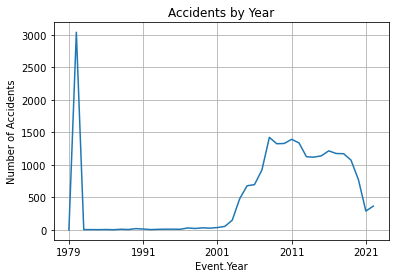

<Figure size 432x288 with 0 Axes>

In [29]:
#Create visualization for Investigation.Type (Accidents)by the Year
GB_Year['Investigation.Type'].plot(kind = 'line')
#plt.style.available
plt.title('Accidents by Year')
plt.xlabel('Event.Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()
plt.style.use('fivethirtyeight')
plt.tight_layout()
#plt.legend()



# Findings
The aviation data spans from 1979 to 2022. The noticeable rise between 1979 and 1983 is due to cumulative years during said period.  However, to provide a more accurate reflection of the aviation industry it is advisable to focus on the last three decades.

In [30]:
GB_Year= Av_Data.groupby(['Event.Year']).count().tail(30)


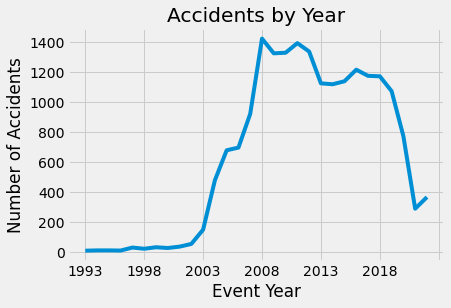

<Figure size 432x288 with 0 Axes>

In [31]:
# Number of accidents in last 3 decades
GB_Year['Investigation.Type'].plot(kind = 'line')
#plt.style.available
plt.title('Accidents by Year')
plt.xlabel('Event Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()
plt.style.use('fivethirtyeight')
plt.tight_layout()
#plt.legend()

# Findings
 During the last thirty years the sharp trajectory peaked in 2008 with 1527 accidents and has seen a steady decline since then. 


In [32]:
# The Human cost fatalities and injuries through the years
GB_Year= Av_Data.groupby(['Event.Year']).sum()


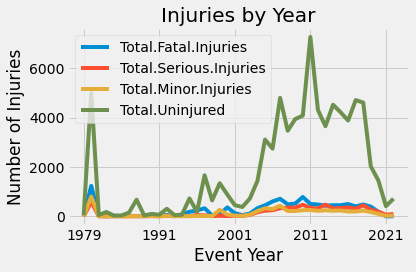

In [33]:
#Create plot
GB_Year.plot( kind='line')
plt.title('Injuries by Year')
plt.xlabel('Event Year')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.style.use('fivethirtyeight')
plt.tight_layout()
#plt.legend()
plt.show()

In [34]:
# Three decades of injuries
GB_Year= Av_Data.groupby(['Event.Year']).sum().tail(30)


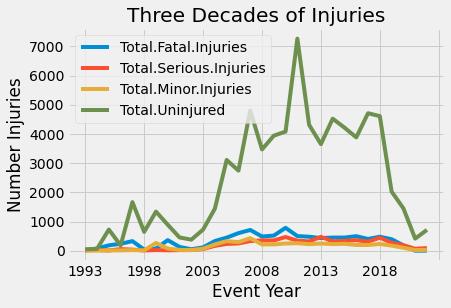

In [35]:
# Three decades of injuries
GB_Year.plot()
plt.style.use('fivethirtyeight')
plt.xlabel('Event Year')
plt.ylabel('Number Injuries')
plt.title('Three Decades of Injuries')
plt.grid(True)
plt.show()

# Finding - Human Cost for Year
In terms of assessing the human cost for each year, the number of fatalities peaked in 2010 followed by a decline as the number of uninjured individuals increased peaking in 2011. 
Throughout the timeframe there is an approximate ratio of 8.8 uninjured to every fatality. This is indicative of a certain level of confidence regarding safety when the mode of transportation is airplane.



# Groupby Country
Grouping by country allows for examination of the geographical aspect and categorize accidents , fatalities and uninjured individuals

In [36]:
GB_Country= Av_Data.groupby(['Country'])


In [37]:
GB_Country.count().sort_values(by=['Investigation.Type'], ascending = False)

,Investigation.Type,Aircraft.Category,Make,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
Country,,,,,,,,,,,
United States,21837,21837,21837,21837,21837,21837,21837,21837,21837,21837,21837
Brazil,77,77,77,77,77,77,77,77,77,77,77
Canada,42,42,42,42,42,42,42,42,42,42,42
Mexico,42,42,42,42,42,42,42,42,42,42,42
Australia,42,42,42,42,42,42,42,42,42,42,42
...,...,...,...,...,...,...,...,...,...,...,...
Qatar,1,1,1,1,1,1,1,1,1,1,1
Republic of North Macedonia,1,1,1,1,1,1,1,1,1,1,1
Gabon,1,1,1,1,1,1,1,1,1,1,1


In [38]:
#The top 20 country for accidents 
GB_Country_Top=GB_Country.count().sort_values(by=['Investigation.Type'], ascending = False).head(20)

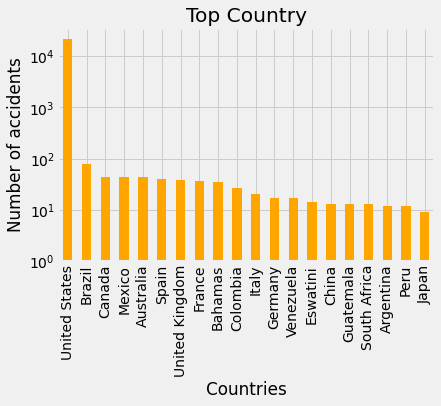

In [39]:
# Create plot
GB_Country_Top['Investigation.Type'].plot(kind='bar',color='orange', log=True )
plt.title('Top Country')
plt.xlabel('Countries')
plt.ylabel('Number of accidents')
plt.grid(True)
plt.style.use('seaborn-dark-palette')

# Findings
The United States tops the list in terms of accidents followed by Brazil a distanced second place. 

In [40]:
#Country by Injuries
GB_Country.sum().sort_values(by=['Total.Fatal.Injuries'],ascending=False)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Country,,,,
United States,8446.690209,6132.697782,4880.887344,68785.672605
Brazil,281.311058,22.595417,26.508185,401.367145
Colombia,237.311058,74.893125,29.762278,225.734289
Cote D'ivoire,169.000000,0.297708,10.000000,6.367145
Pakistan,159.000000,0.000000,0.000000,0.000000
...,...,...,...,...
Senegal,0.000000,0.000000,0.000000,243.000000
Sint Maarten,0.000000,1.000000,0.000000,0.000000
Slovenia,0.000000,0.000000,0.000000,1.000000


In [41]:
GB_Country_30 = GB_Country.sum().sort_values(by= ['Total.Fatal.Injuries'], ascending=False).head(30)

<Figure size 1440x720 with 0 Axes>

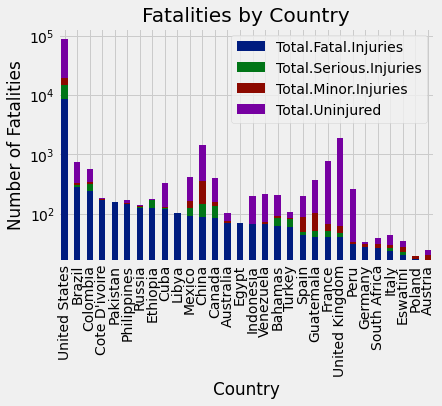

In [42]:
# Top 30 Country by Injuries

plt.figure(figsize=(20, 10))
GB_Country_30.plot( kind='bar',stacked =True, log=True)
plt.title('Fatalities by Country')
plt.xlabel('Country')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.style.use('fivethirtyeight')
plt.show()

# Findings
Among the top thirty countries for fatalities worldwide,the United States leads with the highest number of fatalities.

In [43]:
Uninjured_Country = GB_Country.sum().sort_values(by= ['Total.Uninjured'], ascending = False).head(10)
Uninjured_Country

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Country,,,,
United States,8446.690209,6132.697782,4880.887344,68785.672605
United Kingdom,39.933175,7.488542,14.270464,1806.367145
China,86.277646,58.786250,216.016371,1071.101434
France,40.277646,11.190833,15.016371,692.367145
Puerto Rico,1.311058,0.595417,0.508185,680.000000
Argentina,12.000000,1.000000,3.000000,490.000000
Japan,4.000000,4.000000,6.000000,446.000000
Brazil,281.311058,22.595417,26.508185,401.367145
Guatemala,41.000000,11.000000,50.000000,265.000000


<Figure size 1440x720 with 0 Axes>

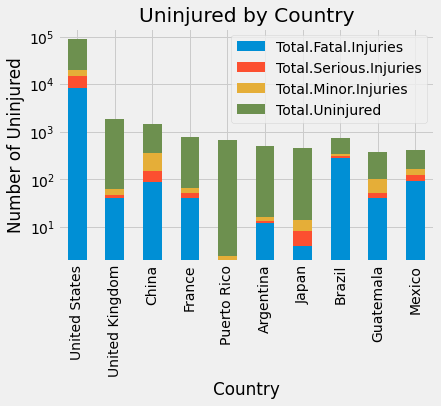

In [44]:
# Top 30 Country by Uninjured

plt.figure(figsize=(20, 10))
Uninjured_Country.plot( kind='bar', stacked=True, log=True)
plt.title('Uninjured by Country')
plt.xlabel('Country')
plt.ylabel('Number of Uninjured')
plt.grid(True)
plt.style.use('fivethirtyeight')
plt.show()

# Findings
In the list of  top ten countries  worldwide for uninjured individuals,the United States leads with the
highest number of uninjured individuals.Additionally Puerto Rico a US territory is in the top five countries. 


# Community Consequences 
Considering the community consequences, the United States leads in terms of accidents, with Brazil trailing significantly behind. It is noteworthy that the United States also records the highest rates of fatalities, injuries, and non-injured individuals, which aligns with its larger number of accidents throughout the data period.

Intriguingly, among the top thirty countries, 100% of Lebanon's and 97% of Libya's records consist of fatalities. Furthermore, the United States stands out as the only country within the top five rankings for both fatalities and uninjured individuals.



 # Groupby Purpose of Flight
 Grouping by the flights by the intended  purpose enables analysis of the business segment and categorize accidents , fatalities and uninjured individuals

In [45]:
#Groupby Purpose.of.flight'
GB_Purpose= Av_Data.groupby(['Purpose.of.flight'])
GB_Purpose

In [46]:
GB_Purpose.count()

,Investigation.Type,Country,Aircraft.Category,Make,Model,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
Purpose.of.flight,,,,,,,,,,,
ASHO,2,2,2,2,2,2,2,2,2,2,2
Aerial Application,973,973,973,973,973,973,973,973,973,973,973
Aerial Observation,152,152,152,152,152,152,152,152,152,152,152
Air Drop,3,3,3,3,3,3,3,3,3,3,3
Air Race show,66,66,66,66,66,66,66,66,66,66,66
Air Race/show,7,7,7,7,7,7,7,7,7,7,7
Banner Tow,83,83,83,83,83,83,83,83,83,83,83
Business,687,687,687,687,687,687,687,687,687,687,687
Executive/corporate,119,119,119,119,119,119,119,119,119,119,119


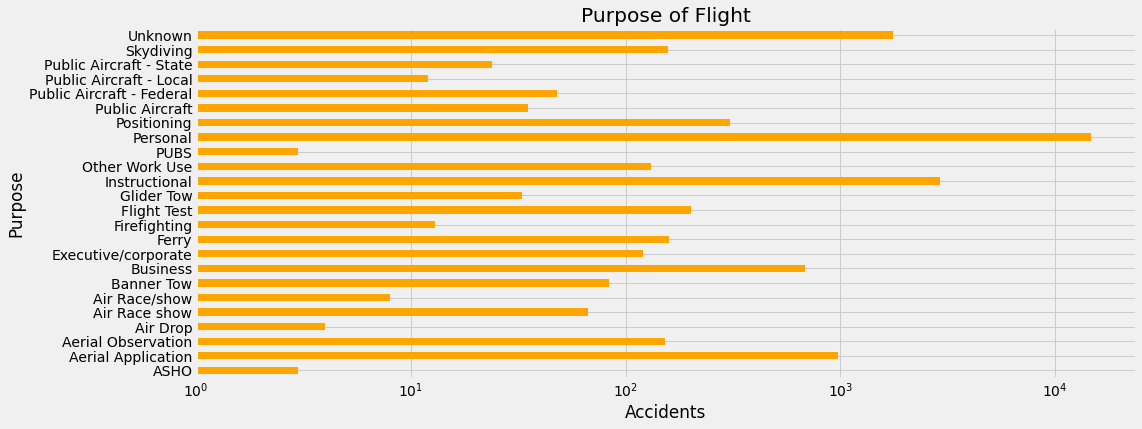

In [47]:
# Create visualization of Accidents and Purpose of flight
plt.figure(figsize=(15, 6))
GB_Purpose.count()['Investigation.Type'].plot( kind='barh', color= 'orange', log=True)
plt.title('Purpose of Flight')
plt.xlabel('Accidents')
plt.ylabel('Purpose')
plt.grid(True)
plt.style.use('fivethirtyeight')
plt.show()

# Findings
Among the various categories,  personal, instructional, unknown and aerial application exhibited the highest accident rates.

In [48]:
GB_Purpose= Av_Data.groupby(['Purpose.of.flight']).sum().sort_values(by=['Total.Fatal.Injuries'], ascending=False)


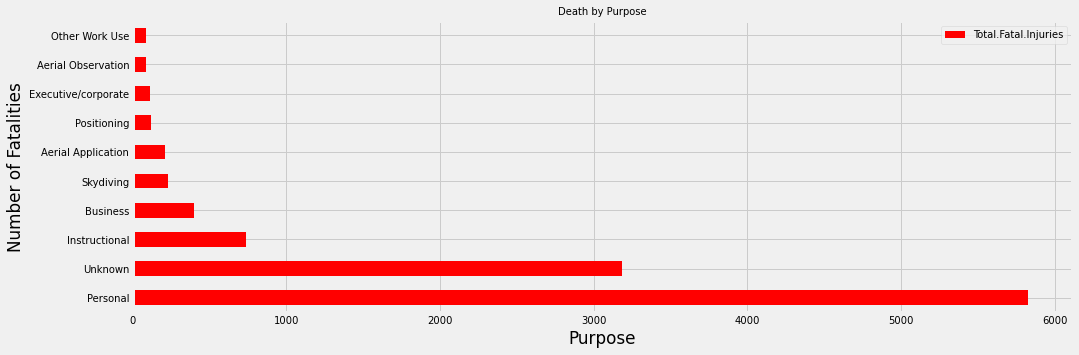

In [49]:
#Create visualization for Death by Purpose of flight
plt.figure(figsize=(15,5))
GB_Purpose['Total.Fatal.Injuries'].head(10).plot(kind= 'barh', color='red' ,  fontsize=10)
plt.title('Death by Purpose',fontsize=10)
plt.xlabel('Purpose')
plt.ylabel('Number of Fatalities' )
plt.grid(True)
plt.legend(fontsize=10)
plt.show()


# Findings
Among the various categories,  personal, instructional, unknown and skydiving showed the highest rates of fatalities.

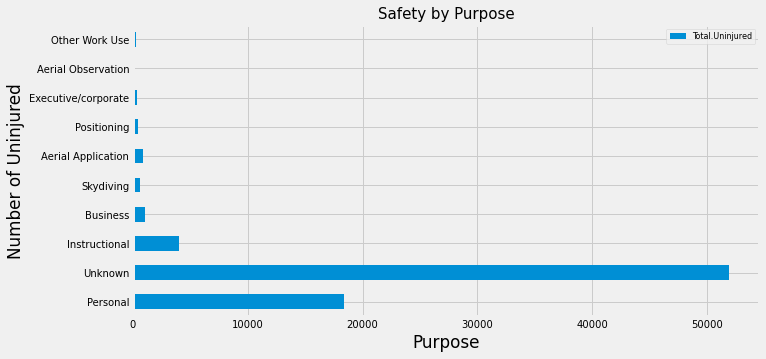

In [50]:

# Create visualization for Purpose of flight and the number of Uninjured
plt.figure(figsize=(10,5))
GB_Purpose['Total.Uninjured'].head(10).plot(kind= 'barh',  fontsize=10)
plt.title('Safety by Purpose',fontsize=15)
plt.xlabel('Purpose')
plt.ylabel('Number of Uninjured' )
plt.grid(True)
plt.legend(fontsize=8)
plt.show()


# Findings
In the different categories,  personal, instructional, unknown and business exhibited the highest rates of individuals that were not injured. 

# Personal and Social Consequences
In terms of personal and social consequences, a noteworthy number of fatalities are associated with trips categorized as 'Personal.'
Interestingly, the 'Unknown' category stands out with the second highest rates of both fatalities and uninjured individuals. It's important to note that the 'Unknown' subset was created to account for missing data. When this 'Unknown' subset is excluded, the top five safest categories, based on the aggregate number of uninjured individuals, are 'Personal,' 'Business,' 'Instructional,' 'Aerial Application,' and 'Skydiving.'
Notably, there have been no recorded fatalities for the 'AirDrop' and 'PUBS' subsets."



# Examine the actual aircraft data
Groupby aircraft model

Groupby aircraft make

Groupby aircraft engine type 


In [51]:
# Examine the actual aricraft data, starting with models
#Groupby models
GB_Model=  Av_Data.groupby('Model')
GB_Model

In [52]:
GB_Model.count().sort_values(['Investigation.Type'],ascending=False)

,Investigation.Type,Country,Aircraft.Category,Make,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
Model,,,,,,,,,,,
172,745,745,745,745,745,745,745,745,745,745,745
152,411,411,411,411,411,411,411,411,411,411,411
172N,301,301,301,301,301,301,301,301,301,301,301
182,283,283,283,283,283,283,283,283,283,283,283
172S,254,254,254,254,254,254,254,254,254,254,254
...,...,...,...,...,...,...,...,...,...,...,...
Fisher Horizon 2,1,1,1,1,1,1,1,1,1,1,1
Flaglor Scooter,1,1,1,1,1,1,1,1,1,1,1
Flightstar IISC,1,1,1,1,1,1,1,1,1,1,1


In [53]:
GB_Models= GB_Model.count().sort_values(['Investigation.Type'],ascending=False)

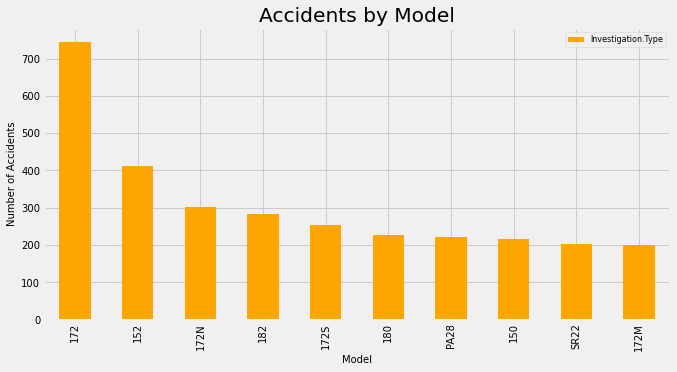

In [54]:
# Riskiest Models. 
# Accidents by Model 
plt.figure(figsize=(10,5))
GB_Models['Investigation.Type'].head(10).plot(kind= 'bar', color='orange',  fontsize= 10)
plt.title('Accidents by Model')
plt.xlabel('Model', fontsize =10)
plt.ylabel('Number of Accidents',fontsize =10)
plt.legend(fontsize =8)
plt.style.use('fivethirtyeight')

# Findings
Within the aircraft models those with highest accident rates are  172, 152, 182, 172N, 172s.


In [55]:
#Death by model
Death_Model=GB_Model['Total.Fatal.Injuries'].sum().sort_values(ascending=False)

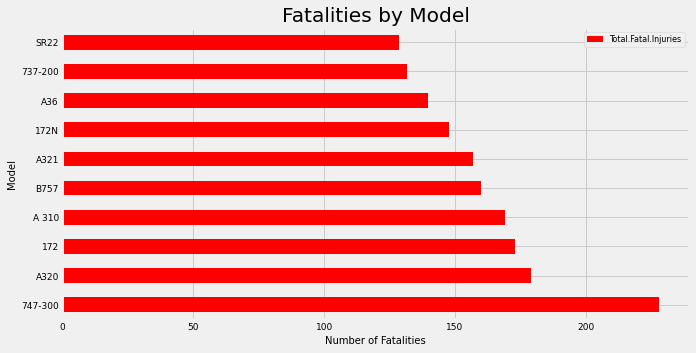

In [56]:
#Death by model

# Create visualization
plt.figure(figsize=(10,5))
Death_Model.head(10).plot(kind= 'barh',color='red', fontsize= 9)
plt.title('Fatalities by Model')
plt.xlabel('Number of Fatalities', fontsize =10)
plt.ylabel('Model',fontsize =10)
plt.legend(fontsize =8)
plt.style.use('fivethirtyeight')
plt.show()

# Findings
Among the aircraft models the 747-300 records the highest number of fatalities. 

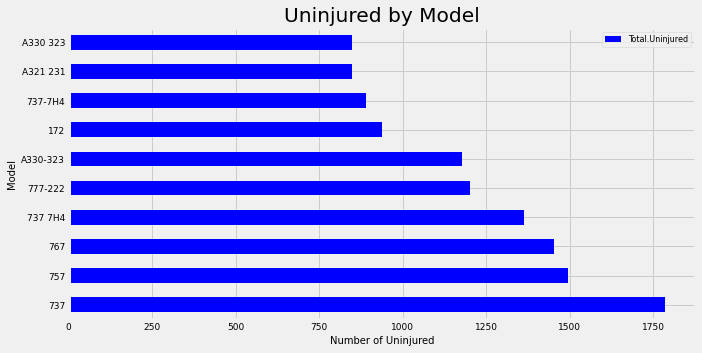

In [57]:
#Safest model
Uninjured_Model=GB_Model['Total.Uninjured'].sum().sort_values(ascending=False)

#Uninjured_Model = GB_Model.sort_values(by='Total.Uninjured', ascending=False)
plt.figure(figsize=(10,5))
Uninjured_Model.head(10).plot(kind= 'barh',color='blue', fontsize= 9)
plt.title('Uninjured by Model')
plt.xlabel('Number of Uninjured', fontsize =10)
plt.ylabel('Model',fontsize =10)
plt.legend(fontsize =8)
plt.style.use('fivethirtyeight')
plt.show()

# Findings
Among the aircraft model categories, the 737 stands out as the highest number of non-injuries to individuals. Notably, along with the 737 the 757, 767 737-7H4 and 777-222 are the top models for highest number of uninjured individuals.

# Groupby aircraft make

In [58]:
GB_Make= Av_Data.groupby(['Make']) 
GB_Make

In [59]:
GB_Make.sum().sort_values('Total.Fatal.Injuries', ascending =False)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Make,,,,
CESSNA,2862.747996,1908.173779,1489.600914,10764.974660
PIPER,1780.630950,1027.594597,831.423582,5526.245873
BOEING,994.020694,668.290001,269.229193,27070.608601
BEECH,939.496442,346.633337,318.876187,2173.458659
AIRBUS,446.655529,55.595417,30.508185,7407.367145
...,...,...,...,...
HOLLEY CAROL L,0.000000,0.000000,0.000000,1.000000
HOLLIER B C,0.000000,0.000000,0.000000,2.000000
HOLLMAN,0.000000,1.000000,0.000000,0.000000


In [60]:
Death_Make=GB_Make['Total.Fatal.Injuries'].sum().sort_values(ascending=False)


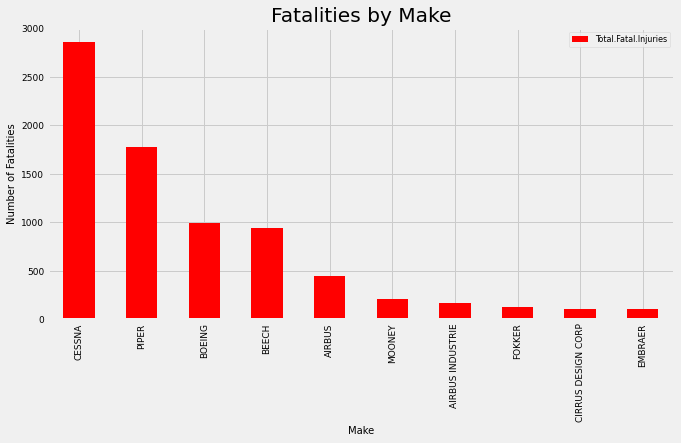

In [61]:
# Highest Death rate  by the Make
plt.figure(figsize=(10,5))
Death_Make.head(10).plot(kind= 'bar',color='red', fontsize= 9)
plt.title('Fatalities by Make')
plt.xlabel('Make', fontsize =10)
plt.ylabel('Number of Fatalities',fontsize =10)
plt.legend(fontsize =8)
plt.style.use('fivethirtyeight')
plt.show()

# Findings
In the the aircraft make categories, the Cessna stands out with the highest number of fatalities. It is worth mentioning that the Cessna, Piper, Boeing, Beech and Airbus are the top makes with the highest number of fatalities.

In [62]:
Uninjured_Make=GB_Make['Total.Uninjured'].sum().sort_values(ascending=False)


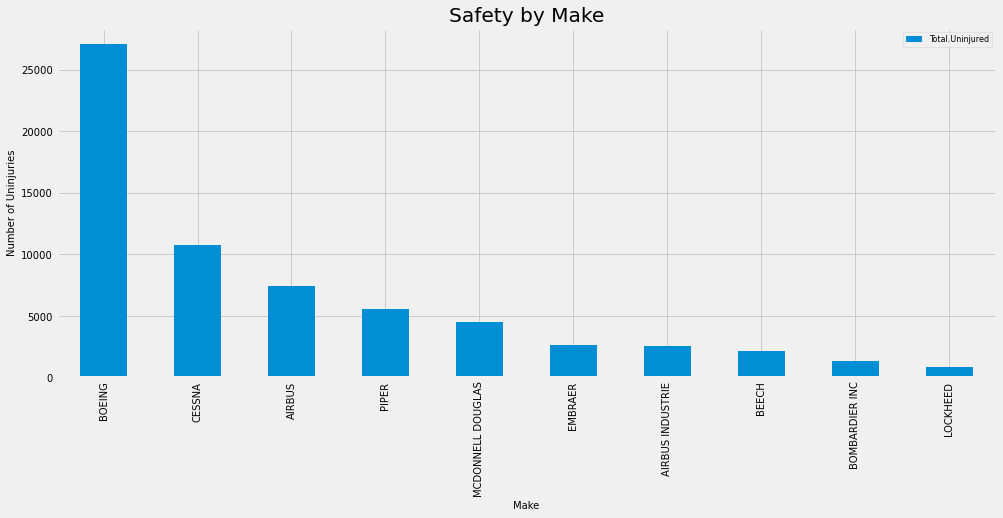

In [63]:
# Top safest Make
plt.figure(figsize=(15,6))
Uninjured_Make.head(10).plot(kind= 'bar', fontsize= 10)
plt.title('Safety by Make')
plt.xlabel('Make', fontsize =10)
plt.ylabel('Number of Uninjuries',fontsize =10)
plt.legend(fontsize =8)
plt.style.use('fivethirtyeight')
plt.show()

# Findings
In the the aircraft make categories, Boeing leads with the highest number of uninjured individuals. Cessna ranks second trailed by the Airbus and Piper.

In [64]:
GB_Make['Investigation.Type'].count()

Make
177MF LLC                1
2021FX3 LLC              1
3XTRIM                   1
781569 INC               1
AARDEMA ROBERT JOHN      1
                        ..
ZIVKO AERONAUTICS INC    4
ZLIN                     3
ZLIN AVIATION            1
ZUBAIR S KHAN            1
ZWICKER MURRAY R         1
Name: Investigation.Type, Length: 3199, dtype: int64

In [65]:
GB_Makes=GB_Make.count()
Accident_Make=GB_Makes[GB_Makes['Investigation.Type']>100].sort_values('Investigation.Type',ascending=False)

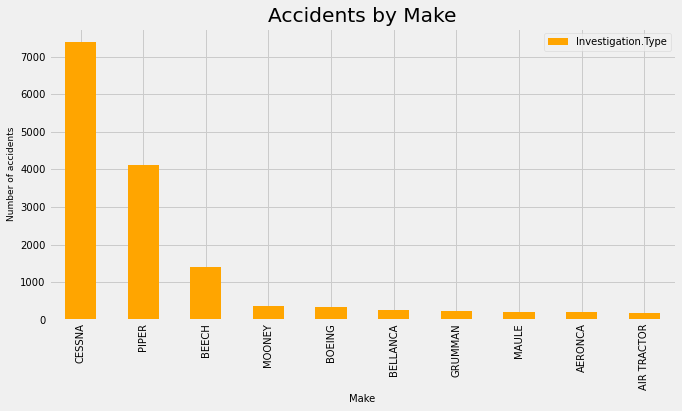

In [66]:
# Accident by Make
bins=5
plt.figure(figsize=(10,5))
Accident_Make['Investigation.Type'].head(10).plot(kind= 'bar', color='orange', fontsize= 10)
plt.title('Accidents by Make')
plt.xlabel('Make', fontsize =10)
plt.ylabel('Number of accidents',fontsize =9)
plt.legend(fontsize =10)
plt.style.use('fivethirtyeight')
plt.show()


# Findings
Within the aircraft make categories, Cessna  stands out with the highest number of accidents followed by Piper, Beech, Mooney, and Boeing. 

# Make
The airplane Make with the highest accident rates are Cessna, Piper, Beech and Boeing. 
Highest fatalities for Make are Cessna, Boeing, Piper and Airbus
The 'Make' with the most uninjured are Boeing Cessna, Airbus and McDonnell Douglas


# Groupby Engine type
 Grouping the data by engine type enables examination of the connection between this aircraft attribute, fatalities and uninjured individuals. 

In [67]:
GB_EngineType=Av_Data.groupby(['Engine.Type'])
GB_EngineType

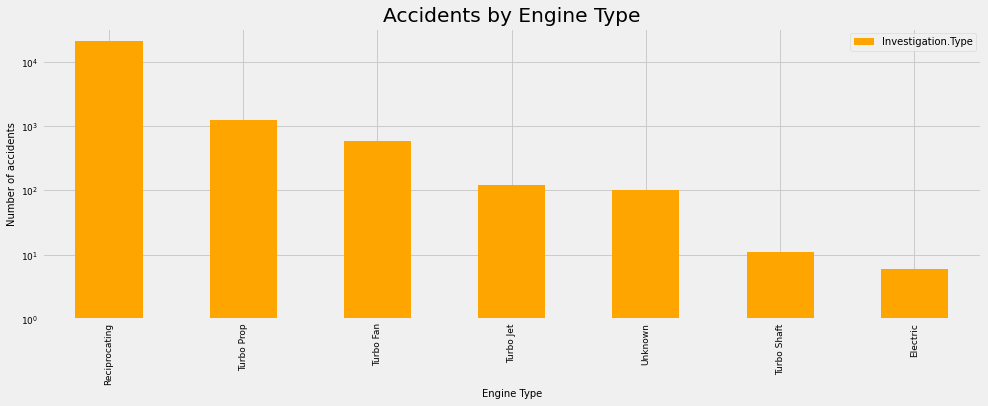

In [68]:
Accidents_EngineType=GB_EngineType['Investigation.Type'].count().sort_values(ascending=False).head(10)
#Accidents by engine type 

plt.figure(figsize=(15,5))
Accidents_EngineType.plot(kind= 'bar', color='orange', log=True,fontsize= 9)
plt.title('Accidents by Engine Type')
plt.xlabel('Engine Type', fontsize =10)
plt.ylabel('Number of accidents',fontsize =10)
plt.legend(fontsize =10)
plt.style.use('fivethirtyeight')
plt.show()

# Findings
Within the aircraft engine type  categories, Reciprocating engine stands out with the highest number of accidents followed by Turbo prop, Turbo Fan, and Turbo Jet.

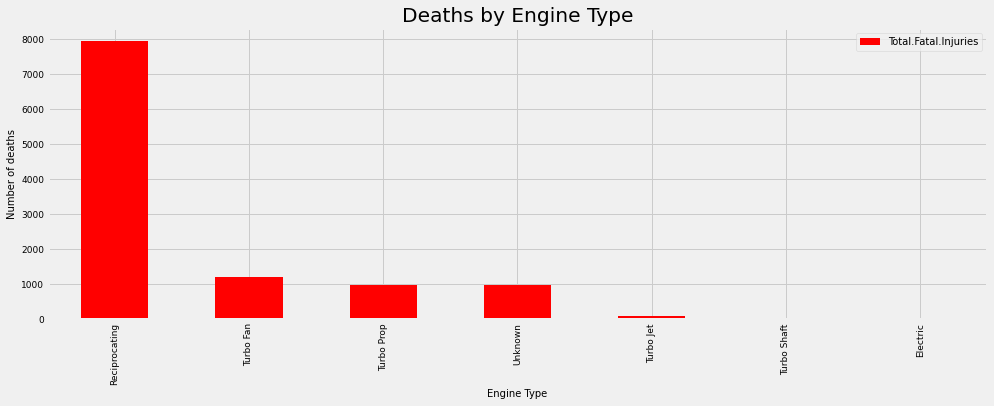

In [69]:
Death_EngineType=GB_EngineType['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)
#Death  by engine type 

plt.figure(figsize=(15,5))
Death_EngineType.plot(kind= 'bar', color='red', fontsize= 9)
plt.title('Deaths by Engine Type')
plt.xlabel('Engine Type', fontsize =10)
plt.ylabel('Number of deaths',fontsize =10)
plt.legend(fontsize =10)
plt.style.use('fivethirtyeight')

# Findings
Within the aircraft engine type categories, the reciprocating engine stands out with the highest number of fatalities followed by Turbo Prop, Turbo Fan, and Unknown. 

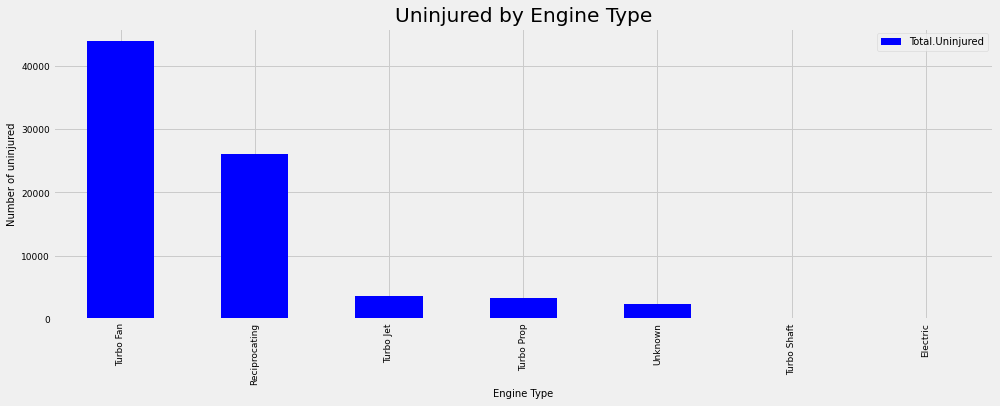

In [70]:
Uninjured_EngineType=GB_EngineType['Total.Uninjured'].sum().sort_values(ascending=False).head(10)
#Death  by engine type 

plt.figure(figsize=(15,5))
Uninjured_EngineType.plot(kind= 'bar', color='blue', fontsize= 9)
plt.title('Uninjured by Engine Type')
plt.xlabel('Engine Type', fontsize =10)
plt.ylabel('Number of uninjured',fontsize =10)
plt.legend(fontsize =10)
plt.style.use('fivethirtyeight')
plt.show()

# Findings
Within the aircraft engine type categories, the Turbo Fan  leads with the highest count of uninjured individuals,followed by the Reciprocating and Turbo Jet engines. 

In [71]:
#Groupby Make and Model
GB_Make_Model=Av_Data.groupby(['Make','Model'])

# Groupby Make and Model

In [72]:
#Accidents by Make and Model 
GB_Make_Model=Av_Data.groupby(['Make','Model'])
GB_Make_Model['Investigation.Type'].count().sort_values(ascending=False).head(10)
Accident_Make_Model=GB_Make_Model['Investigation.Type'].count().sort_values(ascending=False).head(10)

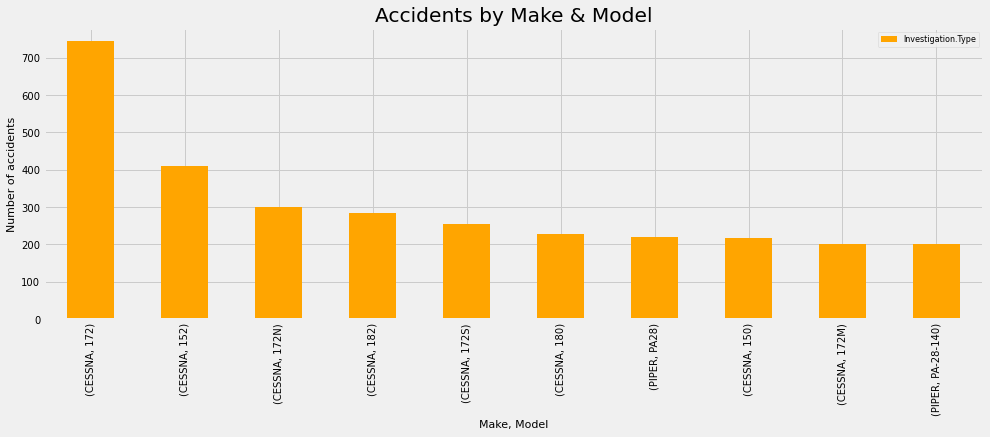

In [73]:
# Accident by Make and Model

plt.figure(figsize=(15,5))
Accident_Make_Model.plot(kind='bar', color='orange', fontsize= 10)
plt.title('Accidents by Make & Model')
plt.xlabel('Make, Model', fontsize =11)
plt.ylabel('Number of accidents',fontsize =11)
plt.legend(fontsize =8)
plt.style.use('fivethirtyeight')
plt.show()


# Findings
In the combined analysis of aircraft make and model, Cessna holds the top six positions with the highest number of accidents, suggesting a higher propensity for accidents in this category.

In [74]:
GB_Make_Model['Total.Uninjured'].sum().sort_values(ascending=False)

Make               Model          
BOEING             737                1785.0
                   757                1493.0
                   767                1451.0
                   737 7H4            1363.0
                   777-222            1201.0
                                       ...  
MOORE GLENN        MORONCA               0.0
MOORE JOSEPH O     VARIEZE               0.0
CHRISTENSEN STEVE  WHEELER EXPRESS       0.0
MORAVAN            Zlin 50LX             0.0
177MF LLC          PITTS MODEL 12        0.0
Name: Total.Uninjured, Length: 6463, dtype: float64

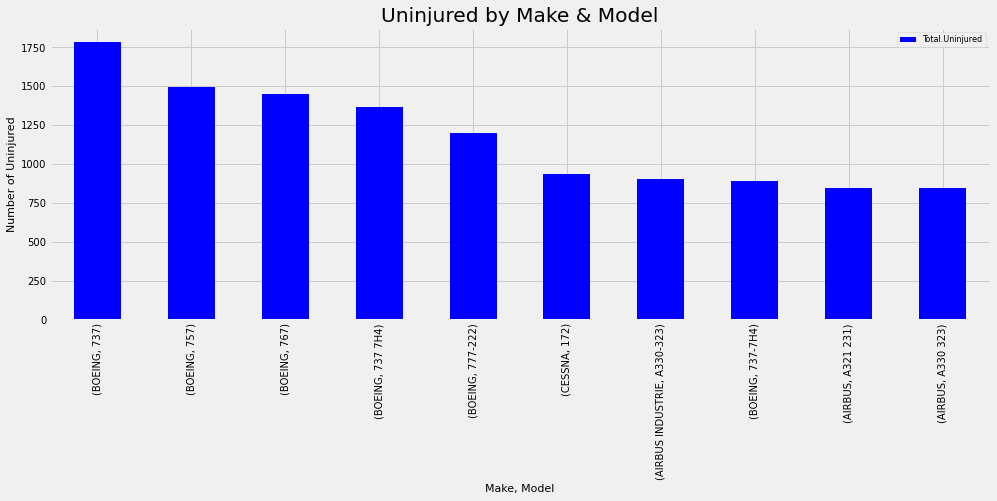

In [75]:
# Uninjured by Make and Model
Noninjury_Make_Model=GB_Make_Model['Total.Uninjured'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15,5))
Noninjury_Make_Model.plot(kind='bar', color='blue', fontsize= 10)
plt.title('Uninjured by Make & Model')
plt.xlabel('Make, Model', fontsize =11)
plt.ylabel('Number of Uninjured',fontsize =11)
plt.legend(fontsize =8)
plt.style.use('fivethirtyeight')
plt.show()


# Findings
In the comprehensive analysis of aircraft make and model, Boeing secures the top five positions with the highest number of uninjured individuals, indicating a higher level of safety within this category. Boeing 737 ranked number one most uninjured individuals. 

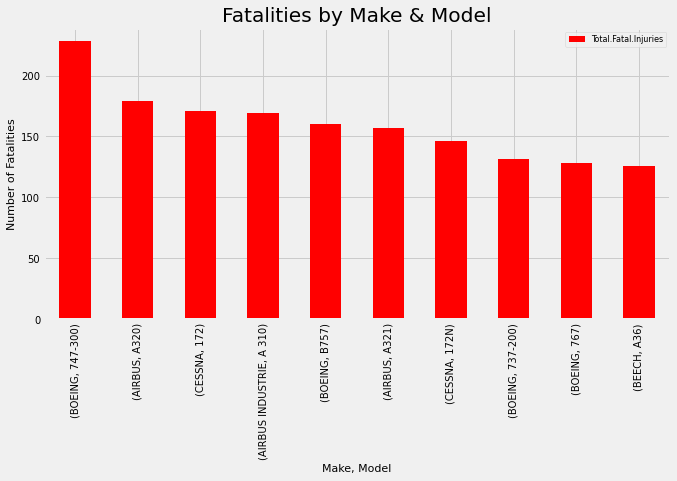

In [76]:
#Fatalities by Make and Model
bin=2
Fatal_Make_Model=GB_Make_Model['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
Fatal_Make_Model.plot(kind='bar', color='red', fontsize= 10)
plt.title('Fatalities by Make & Model')
plt.xlabel('Make, Model', fontsize =11)
plt.ylabel('Number of Fatalities',fontsize =11)
plt.legend(fontsize =8)
plt.style.use('fivethirtyeight')
plt.show()


# Findings
In the thorough examination  of aircraft make and model, Boeing 747-300 ocupies the top  position with the highest number of fatalities, suggesting a lower level of safety within this category. 

In [77]:
Purpose_Make_Model=GB_Make_Model['Purpose.of.flight'].value_counts().sort_values(ascending=False).head(10)

Purpose_Make_Model

Make    Model      Purpose.of.flight
CESSNA  172        Personal             416
                   Instructional        270
        152        Instructional        248
        182        Personal             203
        180        Personal             198
        172N       Personal             182
        152        Personal             147
        172S       Instructional        142
        150        Personal             142
PIPER   PA-28-140  Personal             141
Name: Purpose.of.flight, dtype: int64

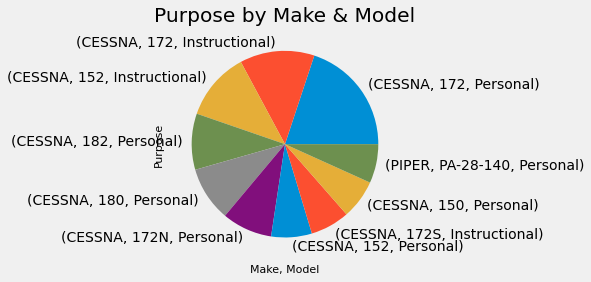

In [78]:
Purpose_Make_Model.plot( kind='pie')
plt.title('Purpose by Make & Model')
plt.xlabel('Make, Model', fontsize =11)
plt.ylabel('Purpose',fontsize =11)
plt.style.use('fivethirtyeight')
plt.show()

# Impact on lives
In the comprehensive analysis of aircraft purpose of flight, make, and model, Cessna's various models exhibit strong associations with specific flight purposes, notably in the 'Personal' and 'Instructional' subsets. Noticeably, the Cessna 172 is recognized as one of the top ten safest airplane.



# Conclusion 

1.	When evaluating the human cost over the years, fatalities reached their peak in 2010, followed by a decline as the number of uninjured individuals increased, reaching its peak in 2011. Throughout this period, there is an approximate ratio of 8.8 uninjured individuals for every fatality. This suggests a notable level of confidence in aviation safety.
2.	Among the top ten countries worldwide in terms of uninjured individuals, the United States leads with the highest number, and Puerto Rico, a U.S. territory, is among the top five countries.
3.	In the category of aircraft Make, Boeing takes the lead with the highest number of uninjured individuals, followed by Cessna, Airbus, and Piper. This reflects the least human consequences.
4.	Among aircraft models, the 737 stands out with the highest number of individuals who did not sustain injuries.
5.	Within the aircraft engine type categories, Turbo Fan engines lead with the highest count of uninjured individuals, followed by Reciprocating and Turbo Jet engines.
6.	In a comprehensive analysis of aircraft make and model, Boeing secures the top five positions with the highest number of uninjured individuals, indicating a higher level of safety in this category, with the Boeing 737 ranking as number one for the most uninjured individuals.
7.	Excluding the 'Unknown' subset, the top five safest categories, based on the aggregate number of uninjured individuals, are 'Personal,' 'Business,' 'Instructional,' 'Aerial Application,' and 'Skydiving.' It's worth noting that there have been no recorded fatalities for the 'AirDrop' and 'PUBS' subsets.
8.	In a thorough analysis of aircraft intended purpose of flight, make, and model, Cessna's various models show strong associations with specific flight purposes, especially in the 'Personal' and 'Instructional' subsets. Notably, the Cessna 172 ranks as one of the top ten safest airplanes.
